In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Data

### Reading the data

In [21]:
df = pd.read_csv('data/Real estate.csv')
df.head()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Preparing the data

In [22]:
del df['No']
df.head()


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [23]:
df['X2 house age']

0      32.0
1      19.5
2      13.3
3      13.3
4       5.0
       ... 
409    13.7
410     5.6
411    18.8
412     8.1
413     6.5
Name: X2 house age, Length: 414, dtype: float64

In [24]:
conditions = [df['X2 house age'] <= 7.5, (df['X2 house age'] > 7.5) & (df['X2 house age'] <= 15), (df['X2 house age'] >
              15) & (df['X2 house age'] <= 22.5), (df['X2 house age'] > 22.5) & (df['X2 house age'] <= 30), (df['X2 house age'] > 30)]
choices = [0, 1, 2, 3, 4]
df['X2 house age'] = np.select(conditions, choices, default=None)
df.head()


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,4,84.87882,10,24.98298,121.54024,37.9
1,2012.917,2,306.59470,9,24.98034,121.53951,42.2
2,2013.583,1,561.98450,5,24.98746,121.54391,47.3
3,2013.500,1,561.98450,5,24.98746,121.54391,54.8
4,2012.833,0,390.56840,5,24.97937,121.54245,43.1


In [25]:
# df['X1 transaction date'] = df['X1 transaction date'].round()
# df.head()

In [26]:
df['X5 latitude'] = df['X5 latitude'] - df['X5 latitude'].mean()
df['X6 longitude'] = df['X6 longitude'] - df['X6 longitude'].mean()
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,4,84.87882,10,0.01395,0.006879,37.9
1,2012.917,2,306.59470,9,0.01131,0.006149,42.2
2,2013.583,1,561.98450,5,0.01843,0.010549,47.3
3,2013.500,1,561.98450,5,0.01843,0.010549,54.8
4,2012.833,0,390.56840,5,0.01034,0.009089,43.1


## Loss function

### Defining a loss function

In [27]:
def mean_squared_error(actual_values: np.array, training_data: pd.DataFrame, coefs: list, constant: int) -> float:

    if(len(actual_values) != len(training_data.index)):
        raise ValueError(
            'no. of actual values should be the same as number of feature vectors')

    if(training_data.shape[1] != len(coefs)):
        raise ValueError(
            'Number of coefs should match number of independent variables')

    # print(f'coefs: {coefs}')

    loss = 0
    n = len(actual_values)

    for index, row in training_data.iterrows():

        r = row.to_numpy()
        t = actual_values[index]

        for i in range(r.size):
            t = (t - (coefs[i] * r[i]))

        t -= constant
        loss += t*t

    loss /= n

    return loss


In [28]:
def absolute_loss(actual_values: np.array, training_data: pd.DataFrame, coefs: list, constant: int):
    if(len(actual_values) != len(training_data.index)):
        raise ValueError(
            'no. of actual values should be the same as number of feature vectors')

    if(training_data.shape[1] != len(coefs)):
        raise ValueError(
            'Number of coefs should match number of independent variables')
        
    loss = 0
    n = len(actual_values)

    for index, row in training_data.iterrows():

        r = row.to_numpy()
        t = actual_values[index]

        for i in range(r.size):
            t = (t - (coefs[i] * r[i]))

        t -= constant
        loss += abs(t)

    loss /= n

    return loss

### Testing the Loss function

In [29]:
X = df.iloc[:,:-1]
y = df['Y house price of unit area'].to_numpy()
X.head()


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,4,84.87882,10,0.01395,0.006879
1,2012.917,2,306.59470,9,0.01131,0.006149
2,2013.583,1,561.98450,5,0.01843,0.010549
3,2013.500,1,561.98450,5,0.01843,0.010549
4,2012.833,0,390.56840,5,0.01034,0.009089


In [30]:
X['X1 transaction date'] = X['X1 transaction date'].round()
X

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2013.0,4,84.87882,10,0.01395,0.006879
1,2013.0,2,306.59470,9,0.01131,0.006149
2,2014.0,1,561.98450,5,0.01843,0.010549
3,2014.0,1,561.98450,5,0.01843,0.010549
4,2013.0,0,390.56840,5,0.01034,0.009089
...,...,...,...,...,...,...
409,2013.0,1,4082.01500,0,-0.02748,-0.029551
410,2013.0,0,90.45606,9,0.00530,0.009739
411,2013.0,2,390.96960,7,0.01020,0.006499
412,2013.0,1,104.81010,5,-0.00229,0.007309


In [31]:
# df["X3 distance to the nearest MRT station"] = np.log(df["X3 distance to the nearest MRT station"])
# df.head()

In [32]:
coefs = [1,1,1,1,1,1]
constant = 0

In [33]:
loss = mean_squared_error(y, X, coefs=coefs, constant=constant)
print(f'loss: {loss}')

loss: 11002425.206856698


## Gradient descent

### Defining it

In [34]:
def gradient_descent(actual_values: np.array, training_data: pd.DataFrame, loss_function=mean_squared_error, learning_rate: float = 1, learning_limiter: float = 1, minimum_loss_difference=0.00005) -> tuple:

    if(len(actual_values) != len(training_data.index)):
        raise ValueError(
            'no. of actual values should be the same as number of feature vectors')
        # actual_values: np.array, training_data: pd.DataFrame, coefs: list,

    def partial_derivative(wrt: int) -> float:

        if(len(actual_values) != len(training_data.index)):
            raise ValueError(
                'no. of actual values should be the same as number of feature vectors')

        if(training_data.shape[1] != len(coefs)):
            raise ValueError(
                'Number of coefs should match number of independent variables')

        # print(f'coefs are: {coefs}')

        d = 0
        for_constant = wrt == -1

        def multiplier(
            arr: np.array) -> float: return 1 if for_constant else float(arr[wrt])

        for index, row in training_data.iterrows():

            r = row.to_numpy()
            t = actual_values[index]

            for i in range(r.size):
                t = (t - (coefs[i]*r[i]))

            t = t*multiplier(r)

            d += t

        n = len(actual_values)
        d = d * -2/n

        return d

    cols = training_data.shape[1]
    coefs = [0 for i in range(cols)]
    constant = 0

    # print(f'coefs are: {coefs}')
    # print(f'constant ->{constant}')
    # print(f'learning limiter: {learning_limiter}')

    count = 0

    loss_vals = []

    prev = 0
    loss = 0

    while True:

        # print(f'at count {count} -> {coefs} and {constant}')

        for i in range(len(coefs)):

            p_d = partial_derivative(i)

            coefs[i] = coefs[i] - (learning_rate * p_d)

        c_pd = partial_derivative(-1)

        constant = constant - (learning_rate * c_pd)

        loss = loss_function(actual_values, training_data, coefs, constant)

        loss_vals.append(loss)

        # print(f'loss is {loss}')

        if loss <= learning_limiter:
            break

        # print(f' loss is greater than learning limiter')
        # print(f' prev is {prev}')
        # print(f' diff : {abs(prev - loss)}')

        if count > 0 and abs(loss - prev) < minimum_loss_difference:
            break

        count += 1

        prev = loss

    plt.plot(loss_vals)
    plt.xlabel('iteration')
    plt.ylabel('loss')
    plt.title('Gradient descent')
    plt.show()

    return (coefs, constant)


### Testing it

In [35]:
# c, i = gradient_descent(y, X, 0.00000001, 50)
# print(f'coefs: {c}')
# print(f'intercept: {i}')


In [37]:

class Linear_Regression:

    def __init__(self, actual_values: np.array = np.array([]), training_data: pd.DataFrame = pd.DataFrame.from_dict({}), loss_function=mean_squared_error, learning_rate: float = 1, learning_limiter: float = 1):
        self.dependent_variable = actual_values
        self.training_data = training_data
        self.loss_function = loss_function
        self.learning_rate = learning_rate
        self.learning_limiter = learning_limiter

    def fit(self, actual_values: np.array, training_data: pd.DataFrame):
        self.dependent_variable = actual_values
        self.training_data = training_data

    def train(self):
        self.coefs, self.intercept = gradient_descent(
            actual_values=self.dependent_variable, training_data=self.training_data, learning_rate=self.learning_rate, learning_limiter=self.learning_limiter)

    def loss(self):
        return self.loss_function(self.dependent_variable, self.training_data, self.coefs, self.intercept)

    def rsme(self):
        return np.sqrt(self.loss())

    def predict(self, current_feature_vector: np.array):
        return np.sum(np.multiply(current_feature_vector, self.coefs)) + self.intercept


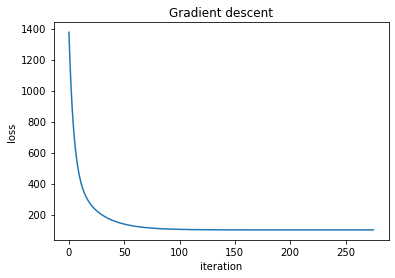

10.042693293042118

In [38]:
model = Linear_Regression(y,X,learning_rate=0.00000001,learning_limiter= 50)
model.train()
model.rsme()

In [39]:
model.coefs

[0.02275854436983186,
 -2.425709279403719e-06,
 -0.007239622416761445,
 0.00010529665390989283,
 2.4391839031957617e-07,
 1.5627015536211586e-07]

In [40]:
model.intercept

1.0544083272233551e-05

In [41]:
model.predict(X.iloc[5].to_numpy())

30.06688030067553

In [42]:
df.iloc[5]['Y house price of unit area']

32.1